In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import seaborn as sns

#import datetime
from datetime import datetime

In [78]:
#Packages related to general operating system & warnings
#import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(10,6))

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor,ExtraTreesClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,roc_curve,auc
from sklearn.metrics import fbeta_score,f1_score,auc
from sklearn.metrics import top_k_accuracy_score,balanced_accuracy_score,average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,classification_report
from datetime import datetime

<Figure size 720x432 with 0 Axes>

In [122]:
df = pd.read_csv('datos.csv')
df.shape

(284807, 36)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  284807 non-null  object 
 1   timestamp       284807 non-null  float64
 2   amount          284807 non-null  float64
 3   variable_01     284807 non-null  float64
 4   variable_02     284807 non-null  float64
 5   variable_03     284807 non-null  float64
 6   variable_04     284807 non-null  float64
 7   variable_05     284807 non-null  float64
 8   variable_06     284807 non-null  float64
 9   variable_07     284807 non-null  float64
 10  variable_08     284807 non-null  float64
 11  variable_09     284807 non-null  float64
 12  variable_10     284807 non-null  float64
 13  variable_11     284807 non-null  float64
 14  variable_12     284807 non-null  float64
 15  variable_13     284807 non-null  float64
 16  variable_14     284807 non-null  float64
 17  variable_1

Thus, there are no non values

In [124]:
df.drop_duplicates(inplace=True)
df.shape

(283726, 36)

In [79]:
# in percentage
100*df["is_fraud"].value_counts()/df.shape[0]

0    99.83329
1     0.16671
Name: is_fraud, dtype: float64

Therefore, this data is severely unbalanced

In [81]:
df["date"] = df.timestamp.apply(lambda x: datetime.fromtimestamp(x))
data=df.sort_values(by='date')

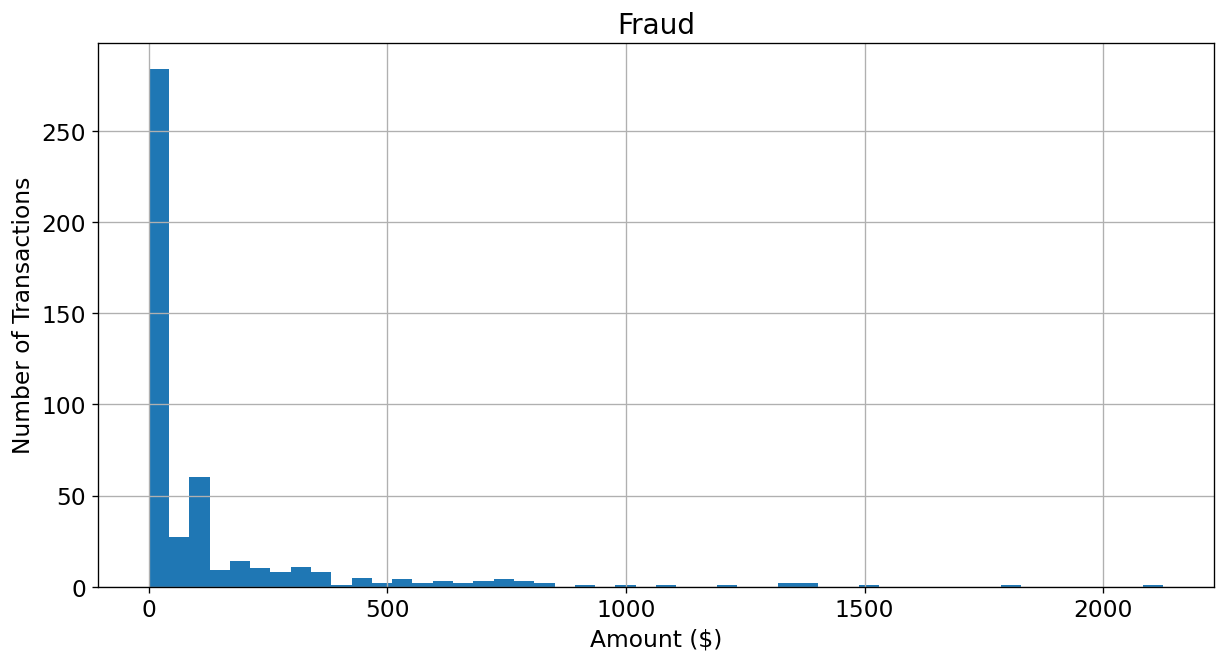

In [84]:
fig, ax= plt.subplots(figsize=(10, 6),dpi=120)
data['amount'][data['is_fraud']==1].hist(bins=50, figsize=(12,6))
ax.set_title('Fraud')
ax.set_xlabel('Amount ($)')
ax.set_ylabel('Number of Transactions')
plt.show()

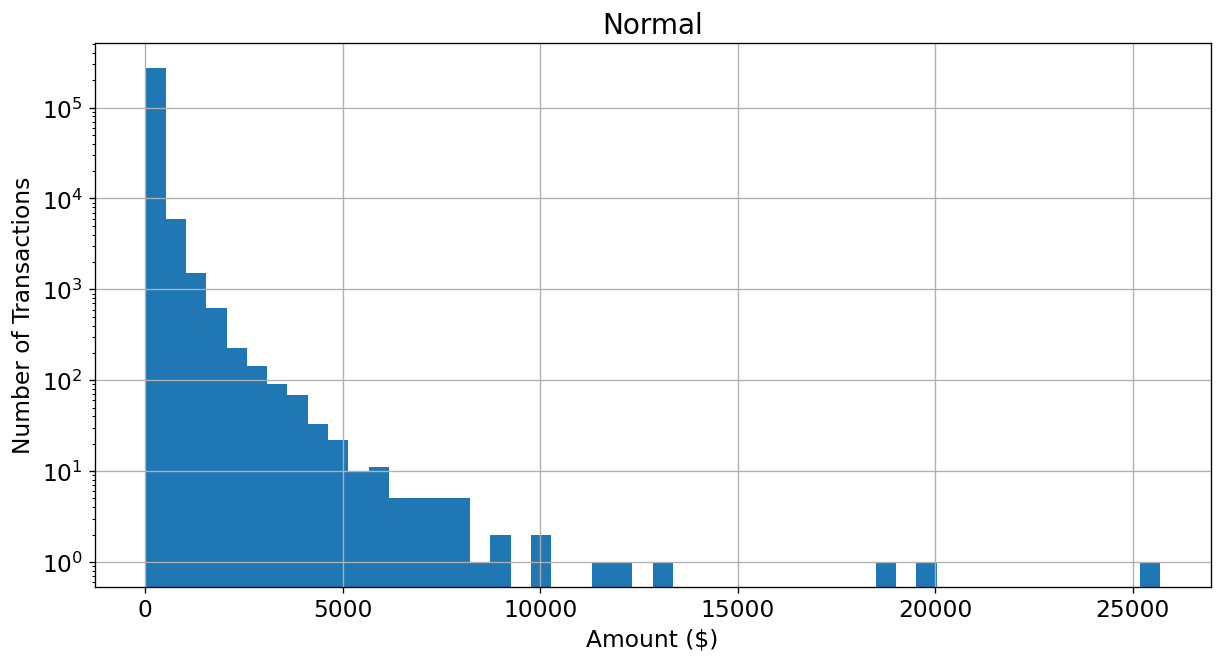

In [85]:
ig, ax= plt.subplots(figsize=(10, 6),dpi=120)
data['amount'][data['is_fraud']==0].hist(bins=50, figsize=(12,6))
ax.set_title('Normal')
ax.set_xlabel('Amount ($)')
ax.set_ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Time dependency may be explored. I have not done a time series analysis or prediction.

In [86]:
df0=data.drop (['transaction_id', 'amount','is_fraud'], axis = 1)

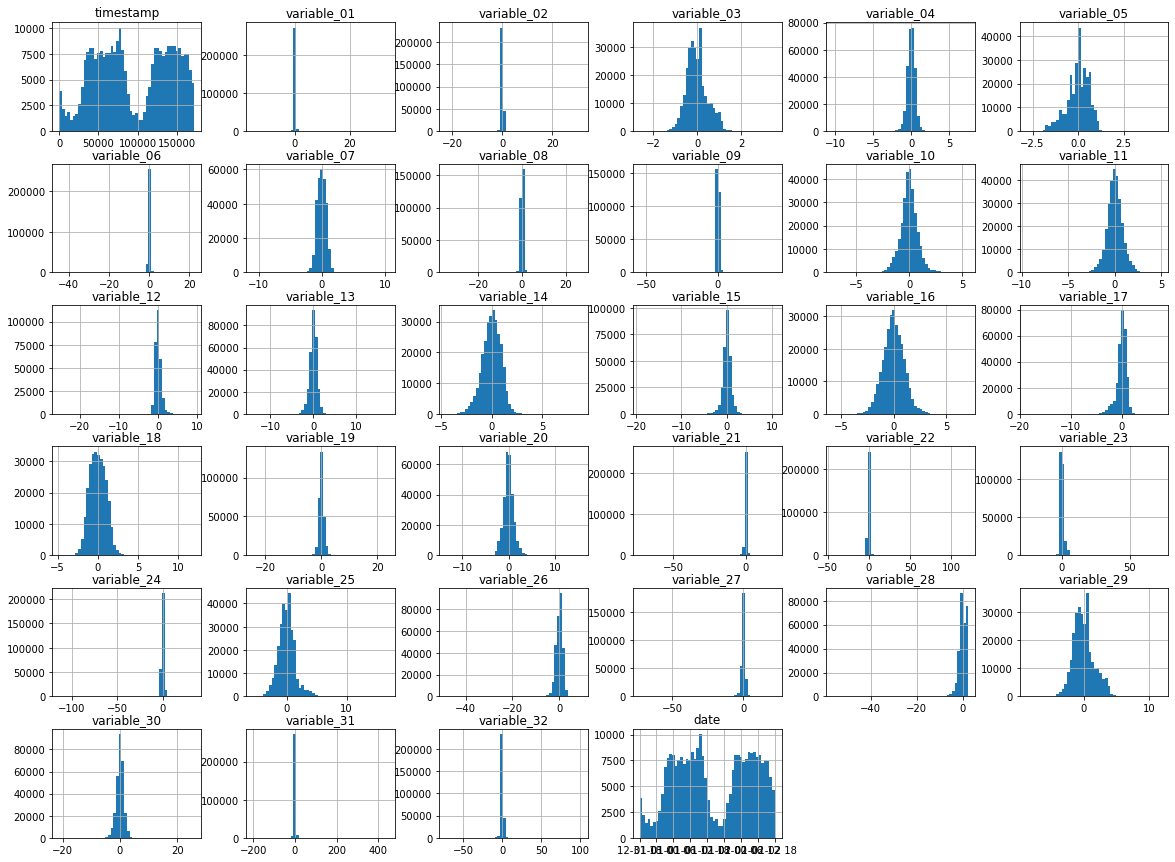

In [87]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
df0.hist(bins=50, figsize=(20,15))
plt.show()

In [92]:
df0 = pd.read_csv('datos.csv')
df0.shape

(284807, 36)

In [93]:
df0.drop_duplicates(inplace=True)
df0.shape

(283726, 36)

In [94]:
df        =df0.drop(['transaction_id','timestamp','amount'], axis = 1)
attributes=df0.drop(['transaction_id','timestamp','is_fraud'], axis = 1);

In [95]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

#X = attributes
X = scaler.fit_transform(attributes)

In [96]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
# only in a Jupyter notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

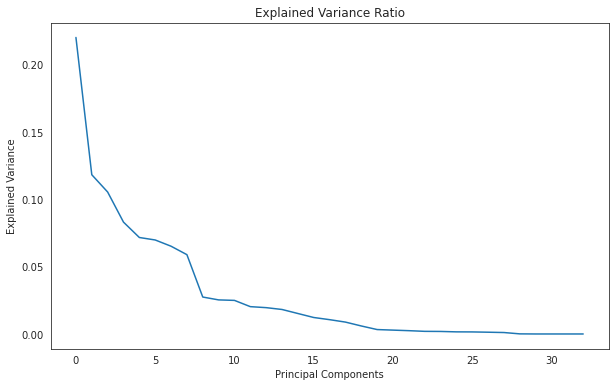

In [97]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)

plt.plot(range(0,X.shape[1]), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
#plt.xticks(range(0,3),
#           ["1st", "2nd","3rd","4st","5nd"], rotation=60)
plt.title('Explained Variance Ratio')
plt.show()

In [98]:
pca.explained_variance_ratio_

array([2.20417773e-01, 1.18375522e-01, 1.05530299e-01, 8.31461752e-02,
       7.17186911e-02, 6.98743104e-02, 6.52346337e-02, 5.89562206e-02,
       2.74623256e-02, 2.53299460e-02, 2.49671163e-02, 2.03153963e-02,
       1.95703649e-02, 1.82103631e-02, 1.52193141e-02, 1.22473934e-02,
       1.06385651e-02, 8.83427814e-03, 5.95126392e-03, 3.28602175e-03,
       2.86671121e-03, 2.45590671e-03, 1.95542581e-03, 1.88031297e-03,
       1.57291867e-03, 1.52348140e-03, 1.30998816e-03, 1.07251160e-03,
       7.67699539e-05, 6.10012671e-32, 5.49213993e-32, 8.56480889e-33,
       6.22012857e-34])

From the above values we can conclude that the varables: variable_29:variable_32 they are not relevant

The below cell is to check this affirmation too, but it take a lot of computation time

In [9]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=attributes.shape[1], n_informative=15,
    n_redundant=5, random_state=7)
    return X, y


# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,attributes.shape[1]+1):
#    for i in range(1,5):    
        steps = [( 'pca' , PCA(n_components=i)), ( 'm' , LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models


# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    score_roc_auc  = cross_val_score(model, X, y, scoring= 'roc_auc' , cv=cv, n_jobs=-1)    
    score_avg_prec = cross_val_score(model, X, y, scoring= 'average_precision', cv=cv, n_jobs=-1)
    score_topk_acc = cross_val_score(model, X, y, scoring= 'top_k_accuracy', cv=cv, n_jobs=-1)
    score_bal_acc  = cross_val_score(model, X, y, scoring= 'balanced_accuracy', cv=cv, n_jobs=-1)
    
    return score_roc_auc,score_avg_prec,score_topk_acc,score_bal_acc  

The next step would be to perform feature engineering selection

In [20]:
plt.rcParams["figure.figsize"] = [16,10]

<AxesSubplot:>

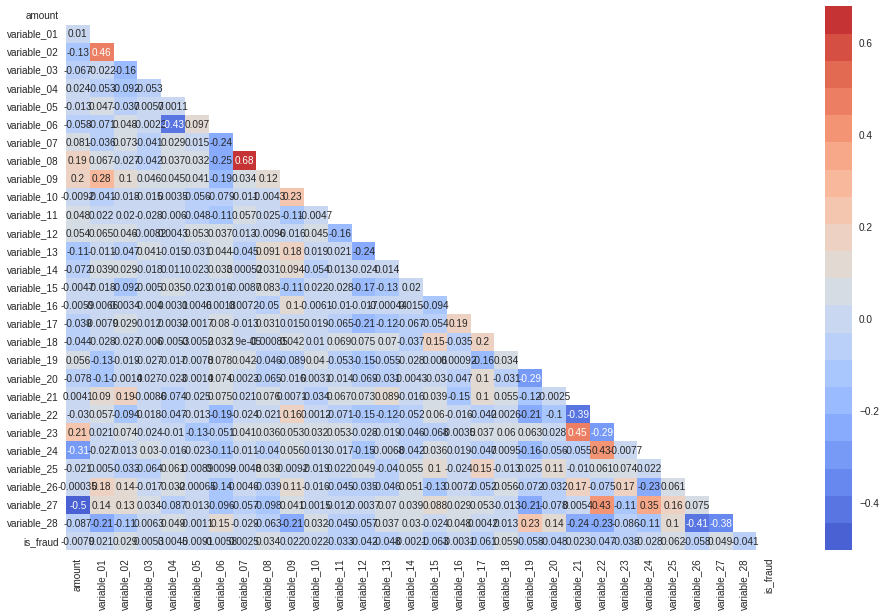

In [21]:

corr_mtx=df.corr(method='spearman')
mask_ut=np.triu(np.ones(corr_mtx.shape)).astype(np.bool)
sns.heatmap(corr_mtx,
            mask=mask_ut,
            annot=True,              
            cmap=sns.color_palette("coolwarm", 20))

From above correlation matrix with respect to 'is_fraud' variable, one can choose a threshold and selecting only those variables above this threshold.

In [47]:
corr_mtx['is_fraud']

amount        -0.008339
variable_01    0.020417
variable_02    0.028311
variable_03    0.005466
variable_04    0.004682
variable_05   -0.009188
variable_06   -0.005017
variable_07    0.002083
variable_08    0.035442
variable_09    0.021574
variable_10    0.022546
variable_11   -0.034872
variable_12   -0.044335
variable_13   -0.049936
variable_14   -0.002841
variable_15   -0.064613
variable_16   -0.003653
variable_17   -0.062870
variable_18    0.060143
variable_19   -0.059564
variable_20   -0.049499
variable_21    0.022706
variable_22   -0.048308
variable_23   -0.038410
variable_24   -0.030147
variable_25    0.063045
variable_26   -0.059278
variable_27    0.051062
variable_28   -0.042424
is_fraud       1.000000
Name: is_fraud, dtype: float64

In [99]:
df0 = pd.read_csv('datos.csv')
df0.shape

(284807, 36)

In [100]:
df0.drop_duplicates(inplace=True)
df0.shape

(283726, 36)

In [101]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
df0['amount'] = scaler.fit_transform(df0['amount'].values.reshape(-1,1))

In [102]:
df        =df0.drop(['transaction_id','timestamp','variable_29', 
                      'variable_30', 'variable_31', 'variable_32'], axis = 1)
attributes=df0.drop(['transaction_id','timestamp','is_fraud','variable_29', 
                      'variable_30', 'variable_31', 'variable_32'], axis = 1);

In [103]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

X = scaler.fit_transform(attributes)
y=df['is_fraud'].values

In [104]:
plt.rcParams["figure.figsize"] = [12,6]

In [105]:
model = ExtraTreesClassifier()
#model.fit(X,y)
model.fit(X,y)
#print(model.feature_importances_)

ExtraTreesClassifier()

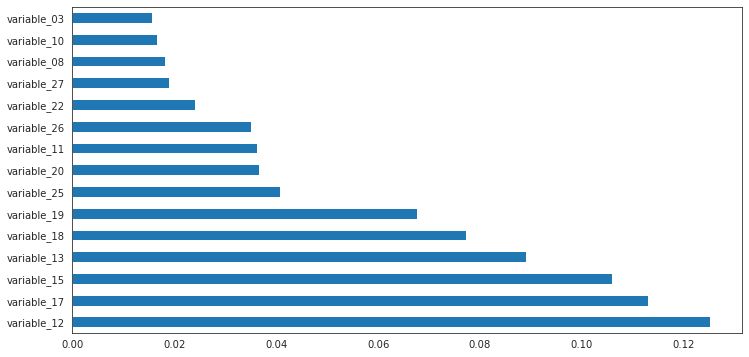

In [106]:
feature_importances_ = pd.Series(model.feature_importances_,index = attributes.columns)
feature_importances_.nlargest(15).plot(kind='barh')
plt.show()

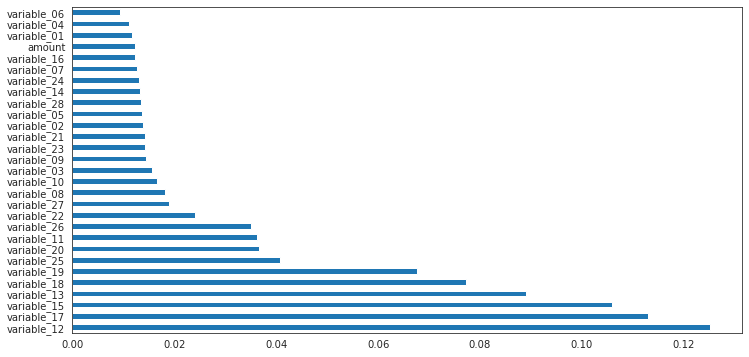

In [107]:
feature_importances_ = pd.Series(model.feature_importances_,index = attributes.columns)
feature_importances_.nlargest(29).plot(kind='barh')
plt.show()

Univariate feature selection

In [109]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

X = scaler.fit_transform(attributes)
y=df['is_fraud'].values

In [110]:
from sklearn.feature_selection import SelectKBest,chi2

bestfeatures = SelectKBest(score_func=chi2, k=15)
fit= bestfeatures.fit(X,y)
dfsocres = pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(attributes.columns)
featureScores = pd.concat([dfcolumns,dfsocres],axis=1)
featureScores.columns = ["atributos","Score"]
data=featureScores.sort_values(by='Score',ascending=False) 
data.set_index("atributos", inplace=True) 
#featureScores.columns = ["atributos","Score"]
#data=featureScores.sort_values(by='Score',ascending=False)
data

,Score
atributos,
variable_18,81.097506
variable_25,74.063715
variable_15,38.746040
variable_17,35.594965
variable_12,22.855403
variable_13,17.078159
variable_11,15.981961
variable_19,11.850077
variable_20,7.719336


<AxesSubplot:ylabel='atributos'>

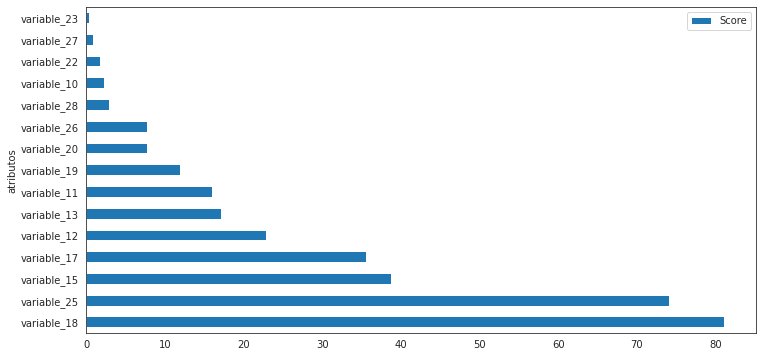

In [111]:
#featureScores.sort_values(by='Score',ascending=False)[:15].plot(kind='barh')
data[:15].plot(kind='barh')

Recursive feature elimination with cross validation

In [115]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [116]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

X = scaler.fit_transform(attributes)
y=df['is_fraud'].values

In [117]:
model_lr = LogisticRegression()

In [118]:
rfe = RFE(estimator=model_lr, step=1)
rfe = rfe.fit(X, y)

In [119]:
selected_rfe_features = pd.DataFrame({'Feature':list(attributes.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
28,variable_28,1
25,variable_25,1
2,variable_02,1
23,variable_23,1
21,variable_21,1
5,variable_05,1
20,variable_20,1
7,variable_07,1
8,variable_08,1
9,variable_09,1


In [120]:
rfecv = RFECV(estimator=model_lr, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X, y)

In [121]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', attributes.columns[rfecv.support_])

Optimal number of features : 8
Best features : Index(['variable_07', 'variable_08', 'variable_13', 'variable_15',
       'variable_16', 'variable_19', 'variable_21', 'variable_25'],
      dtype='object')


The following three cells correspond to Exhaustive Feature Selection (I have not executed here because it takes a lot of time

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

from sklearn.ensemble import RandomForestClassifier

cfl = ExhaustiveFeatureSelector(RandomForestClassifier(),
                                 min_features = 4,
                                 max_features = 20,
                                 scoring='roc_auc',
                                 cv=5
                                )

cfl = cfl.fit(X,y)

In [ ]:
list(cfl.best_idx_)

In [ ]:
select_features = x_train.columns

Next, I will use pycaret. You can install the full version with pip install pycaret[full]. Here I have used GPU.

In [ ]:
from pycaret.classification import *
import pycaret

In [ ]:
df0 = pd.read_csv('datos.csv')
df0.drop_duplicates(inplace=True)

In [ ]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
df0['amount'] = scaler.fit_transform(df0['amount'].values.reshape(-1,1))

In [ ]:
df        =df0.drop(['transaction_id','timestamp','variable_29', 
                      'variable_30', 'variable_31', 'variable_32'], axis = 1)
attributes=df0.drop(['transaction_id','timestamp','is_fraud','variable_29', 
                      'variable_30', 'variable_31', 'variable_32'], axis = 1);

In [8]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

X = scaler.fit_transform(attributes)
y=df['is_fraud'].values

In [9]:
#fix_imbalance will automaticaaly fix the imbalanced dataset by oversampling using the SMOTE method.
clf=setup(data=df,target='is_fraud',fix_imbalance=True,use_gpu=True) 

,Description,Value
0,session_id,1639
1,Target,is_fraud
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(283726, 30)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
models()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
#Uncomment the following code to compare the performance of all the classification models
compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9755,0.8091,0.8548,0.8295,0.8292,0.8304,29.1020
et,Extra Trees Classifier,0.9995,0.9748,0.8152,0.8922,0.8500,0.8498,0.8516,8.8190
xgboost,Extreme Gradient Boosting,0.9993,0.9763,0.8364,0.7634,0.7961,0.7957,0.7976,1.2440
lightgbm,Light Gradient Boosting Machine,0.9988,0.9612,0.8424,0.6098,0.7027,0.7022,0.7137,1.4850
catboost,CatBoost Classifier,0.9988,0.9729,0.8485,0.6183,0.7116,0.7110,0.7219,6.6710
dummy,Dummy Classifier,0.9983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1370
knn,K Neighbors Classifier,0.9981,0.9283,0.8333,0.4640,0.5943,0.5934,0.6200,12.7580
dt,Decision Tree Classifier,0.9976,0.8884,0.7788,0.3869,0.5162,0.5151,0.5475,19.5340
ridge,Ridge Classifier,0.9845,0.0000,0.8364,0.0843,0.1530,0.1504,0.2623,0.3140
lda,Linear Discriminant Analysis,0.9845,0.9667,0.8364,0.0843,0.1530,0.1504,0.2623,1.2240


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1639, verbose=0,
                       warm_start=False)

In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9996,0.9422,0.8182,0.9310,0.8710,0.8708,0.8726
1,0.9994,0.9781,0.7576,0.8929,0.8197,0.8194,0.8222
2,0.9994,0.9957,0.7879,0.8387,0.8125,0.8122,0.8126
3,0.9994,0.9939,0.9091,0.7895,0.8451,0.8448,0.8469
4,0.9995,0.9781,0.8182,0.8710,0.8438,0.8435,0.8439
5,0.9994,0.9937,0.7879,0.8387,0.8125,0.8122,0.8126
6,0.9995,0.9626,0.8182,0.8710,0.8438,0.8435,0.8439
7,0.9992,0.9297,0.6667,0.8148,0.7333,0.7329,0.7366
8,0.9994,0.9988,0.8182,0.8438,0.8308,0.8305,0.8306
9,0.9996,0.9826,0.9091,0.8571,0.8824,0.8822,0.8825


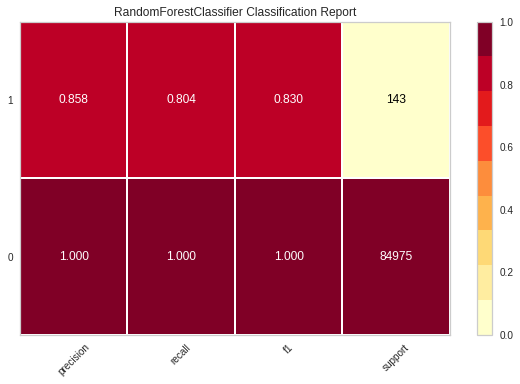

In [13]:
# Plotting the classification report
plot_model(rf,plot='class_report')

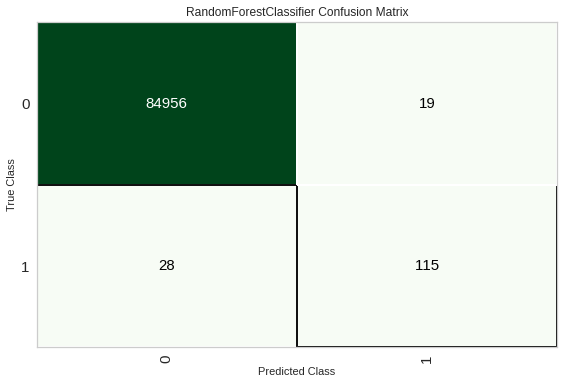

In [14]:
# Plotting the confusion matrix
plot_model(rf,plot='confusion_matrix')

In [ ]:
tuned_rf = tune_model(rf)

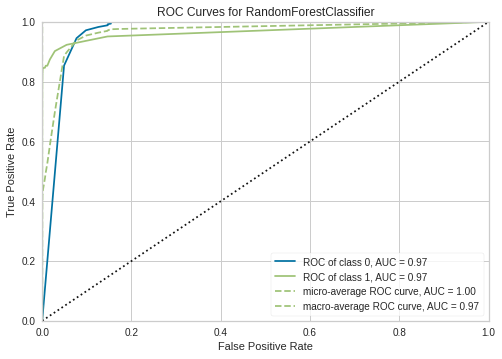

In [15]:
plot_model(rf, plot = 'auc')

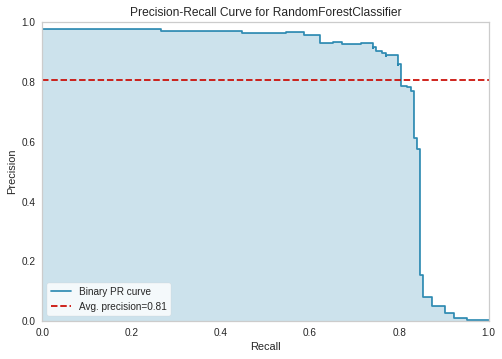

In [16]:
plot_model(rf, plot = 'pr')

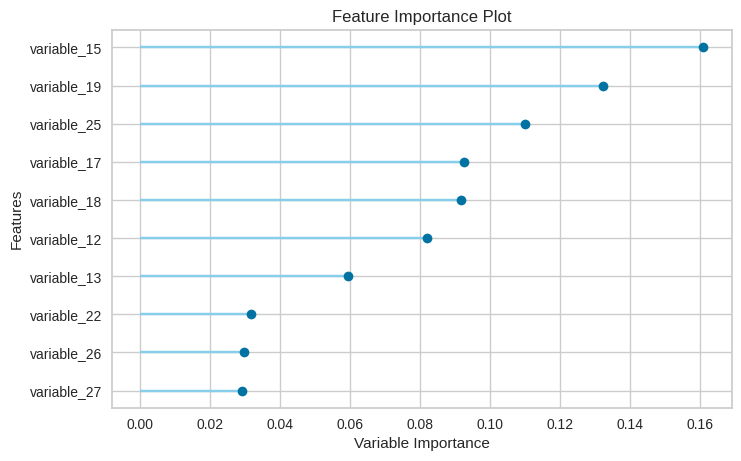

In [17]:
plot_model(rf, plot='feature')

I will use the above main variables from now on

In [19]:
predict_model(rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9994,0.9672,0.8042,0.8582,0.8303,0.8300,0.8305


It can be used xgboos too as follows

In [10]:
#xgboost = create_model('xgboost')

In [ ]:
main_attributes=attributes[['variable_12','variable_13','variable_15','variable_17','variable_18',
                            'variable_19','variable_22','variable_25','variable_26','variable_27']]

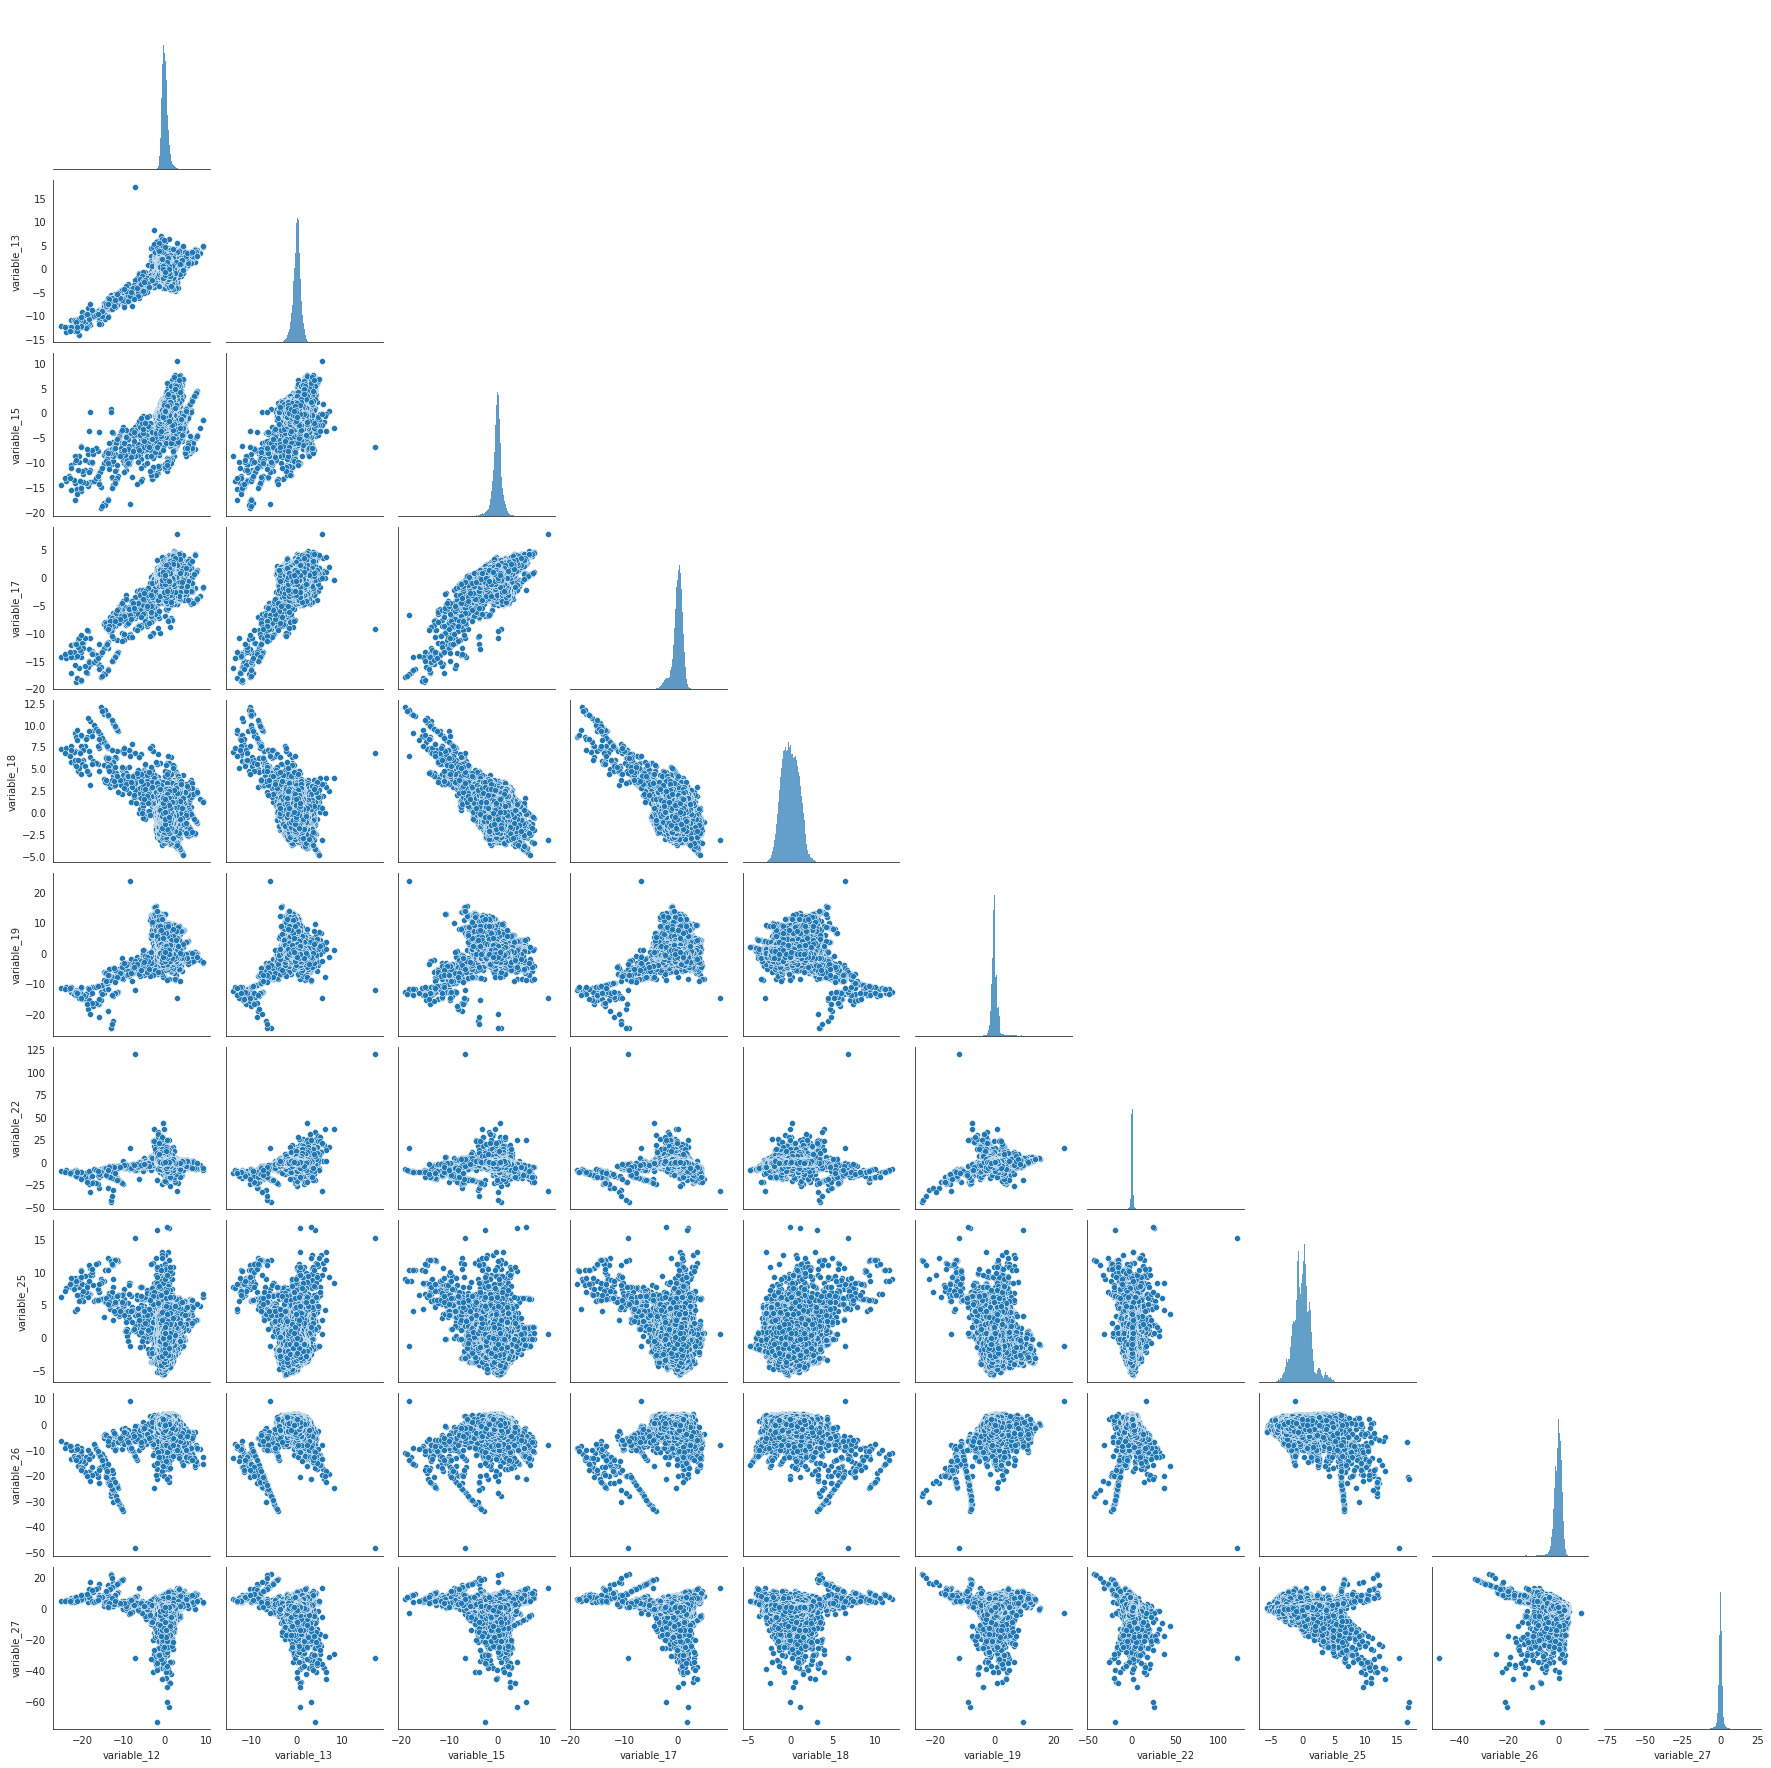

In [91]:
%matplotlib inline
import seaborn as sns; sns.set_style("white")
#sns.pairplot(df.loc[:,"variable_01":"variable_04"], 
sns.pairplot(main_attributes, 
             diag_kind='hist', #hist kde
             palette="bright",
             corner=True
             )

Above figure shows the joint pair plot of the main variables' distributions

Next, I will obtain some results obtained using pycaret from scratch using the most relevant variables and SMOTE. It can be used undersample and a combination of oversample(SMOTE) and undersample. Also, it can be used random oversampling (ROS)

In [ ]:
df0 = pd.read_csv('datos.csv')
df0.shape

df0.drop_duplicates(inplace=True)
df0.shape

In [ ]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
df0['amount'] = scaler.fit_transform(df0['amount'].values.reshape(-1,1))

In [ ]:
df        =df0.drop(['transaction_id','timestamp','variable_29', 
                      'variable_30', 'variable_31', 'variable_32'], axis = 1)
attributes=df0.drop(['transaction_id','timestamp','is_fraud','variable_29', 
                      'variable_30', 'variable_31', 'variable_32'], axis = 1);

In [ ]:
main_attributes=attributes[['variable_12','variable_13','variable_15','variable_17','variable_18',
                            'variable_19','variable_22','variable_25','variable_26','variable_27']]

In [ ]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

#X_unb = scaler.fit_transform(attributes)
X_imb = scaler.fit_transform(main_attributes)
y_imb=df['is_fraud'].values

In [ ]:
#Let us try some sampling technique to remove class imbalance
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE(Synthetic Minority Oversampling TEchnique)  consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
smote = SMOTE('minority')

In [ ]:
X, y = smote.fit_resample(X_imb, y_imb)
print(X.shape, y.shape)

I will use the following algorithms

In [13]:
DT = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')
KNN = KNeighborsClassifier(n_neighbors = 5)
lr = LogisticRegression()
rf = RandomForestClassifier(max_depth = 2)
et = ExtraTreesClassifier(max_depth = 2, criterion = 'entropy')
xgboost=XGBClassifier()

In [14]:
models=[KNN,DT,lr,rf,et,xgboost]

Some important metrics for imbalanced data are roc_auc, precision, f1 and balanced_accuracy

In [15]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
    score_roc_auc  = cross_val_score(model, X, y, scoring= 'roc_auc' , cv=cv, n_jobs=-1)    
    score_prec     = cross_val_score(model, X, y, scoring= 'precision', cv=cv, n_jobs=-1)
    score_bal_acc  = cross_val_score(model, X, y, scoring= 'balanced_accuracy', cv=cv, n_jobs=-1)
    score_f1       = cross_val_score(model, X, y, scoring= 'f1', cv=cv, n_jobs=-1)
    
    return score_roc_auc,score_prec,score_bal_acc,score_f1   

In [16]:
results_roc_auc,results_prec, results_bal_acc,results_f1 = list(),list(),list(),list()

In [17]:
for model in models:
    score_roc_auc,score_prec,score_bal_acc,score_f1 = evaluate_model(model,X, y)
    results_roc_auc.append(score_roc_auc)
    results_prec.append(score_prec)
    results_bal_acc.append(score_bal_acc)
    results_f1.append(score_f1)

In [23]:
results_ROC_AUC=np.mean(results_roc_auc,axis=1)
results_PRE    =np.mean(results_prec,axis=1)
results_BAL_ACC=np.mean(results_bal_acc,axis=1)
results_F1     =np.mean(results_bal_acc,axis=1)

In [24]:
results={'AUC ROC': results_ROC_AUC, 
         'Precision': results_PRE,
         'Balanced Accuracy': results_BAL_ACC,
         'F1': results_F1
         }  

In [25]:
dummy=pd.DataFrame(data=results,index=['KNN','DT','lr','rf','et','xgboost'])
metricas=dummy.sort_values(by='AUC ROC',ascending=False)

In [26]:
import warnings
warnings.filterwarnings('ignore')
metricas

,AUC ROC,Precision,Balanced Accuracy,F1
xgboost,0.999956,0.997794,0.998786,0.998786
KNN,0.999432,0.996959,0.998475,0.998475
lr,0.982371,0.972149,0.934518,0.934518
et,0.971937,0.999070,0.908599,0.908599
rf,0.970623,0.989282,0.928250,0.928250
DT,0.949924,0.988881,0.912884,0.912884


Next, I will get the similar results as above without using cross validation

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
lr.fit(X_train, y_train)
print("Score: ", lr.score(X_test, y_test))

Score:  0.9351346262474111


In [62]:
lr_yhat = lr.predict(X_test)

In [68]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9351346262474111
F1 score of the Logistic Regression model is 0.9323830319683996


In [103]:
print(classification_report(y_test, lr_yhat))
print(accuracy_score(y_test, lr_yhat))
print(fbeta_score(y_test, lr_yhat, average='macro', beta=0.5))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85039
           1       0.97      0.90      0.93     84913

    accuracy                           0.94    169952
   macro avg       0.94      0.94      0.94    169952
weighted avg       0.94      0.94      0.94    169952

0.9351346262474111
0.936418878212308


In [69]:
plt.rcParams["figure.figsize"] = [12,8]

In [83]:
y_predicted = np.array(lr_yhat).reshape(1, -1)
y_true = np.array(y_test).reshape(1, -1)

In [82]:
y_true.shape

(1, 169952)

<Figure size 864x576 with 0 Axes>

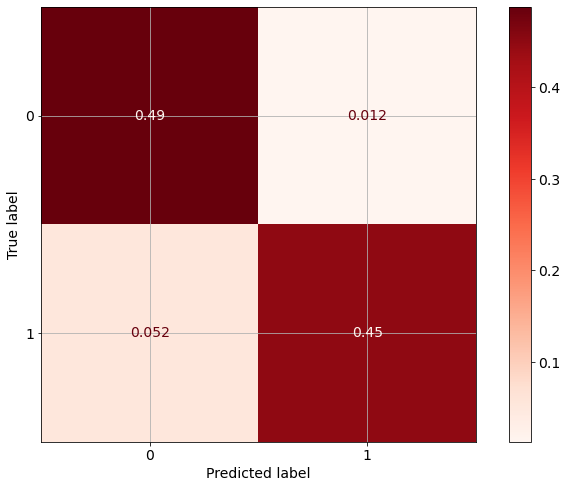

In [73]:
fig = plt.figure()
disp = plot_confusion_matrix(lr, X_test, y_test,
                            #  display_labels=['1','0'],
                             cmap=plt.cm.Reds, normalize = 'all'
                            )

In [92]:
confusion_matrix = confusion_matrix(y_test, lr_yhat)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
[[82922  2117]
 [ 8907 76006]]


<AxesSubplot:>

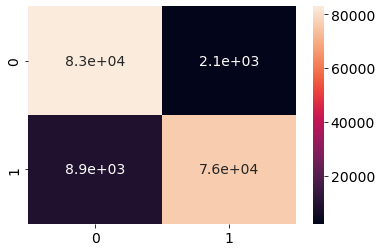

In [97]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True)

In [107]:
df_cm=confusion_matrix(y_test, lr_yhat)
TN  = df_cm[0][0]
FN  = df_cm[1][0]
TP  = df_cm[1][1]
FP  = df_cm[0][1]
PPV = TP/(TP + FP)
NPV = TN/(FN + TN)
Sensitivity       = TP/(TP + FN)
Spec = TN/(FP + TN)
FNR = FN/(FN + TP)
print('TN = ',TN)
print('FN = ',FN)
print('TP = ',TP)
print('FP = ',FP)
print('PPV = ',PPV) #Positive Predictive Value
print('NPV = ',NPV) #Negative Predictive Value
print('Sensitivity = ',Sensitivity)
print('Specificitivity = ',Spec)
print('FNR = ',FNR) #false negative rate = 1 - Sensitivity

TN =  82922
FN =  8907
TP =  76006
FP =  2117
PPV =  0.9729017062836809
NPV =  0.9030044974898997
Sensitivity =  0.8951044009751157
Specificitivity =  0.9751055398111454
FNR =  0.1048955990248843
0.10489559902488432


In [125]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

#X_unb = scaler.fit_transform(attributes)
X_imb = scaler.fit_transform(main_attributes)
y_imb=df['is_fraud'].values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.3)

In [129]:
lr = LogisticRegression(C=c, class_weight="balanced")
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
df_cm=confusion_matrix(y_test, lr_yhat)
TN  = df_cm[0][0]
FN  = df_cm[1][0]
TP  = df_cm[1][1]
FP  = df_cm[0][1]
#    PPV = TP/(TP + FP)
#    NPV = TN/(FN + TN)
#    Sensitivity = TP/(TP + FN)
#    Spec = TN/(FP + TN)
FNR = FN/(FN + TP)


print(FNR)


0.0945945945945946


FNR is the fals negative rate. FNR is very important for this fraud card prediction

Hyperparameter tunning

In the following I have set up small grid just to save time. It was just for showing how one could do hyperparameter tunning

I have just used logistic regression, decision tree and the KNN algorithms.

In [55]:
from sklearn.pipeline import make_pipeline
model_lr  = make_pipeline(lr)
model_knn = make_pipeline(KNN)
model_dt  = make_pipeline(DT)

In [36]:
# Set the parameters by cross-validation

tuned_parameters = [{ 'logisticregression__penalty': ['l1'],  
                     'logisticregression__C': np.arange(0, 100, 10)},
                    { 'logisticregression__penalty': ['l2'],  
                     'logisticregression__C': np.arange(.05, 5, .05)}]                     



clf = GridSearchCV(model_lr,
                   tuned_parameters, 
                   scoring='precision')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'logisticregression__C': 0.05, 'logisticregression__penalty': 'l2'}

Grid scores on development set:

nan (+/-nan) for {'logisticregression__C': 0, 'logisticregression__penalty': 'l1'}
nan (+/-nan) for {'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}
nan (+/-nan) for {'logisticregression__C': 20, 'logisticregression__penalty': 'l1'}
nan (+/-nan) for {'logisticregression__C': 30, 'logisticregression__penalty': 'l1'}
nan (+/-nan) for {'logisticregression__C': 40, 'logisticregression__penalty': 'l1'}
nan (+/-nan) for {'logisticregression__C': 50, 'logisticregression__penalty': 'l1'}
nan (+/-nan) for {'logisticregression__C': 60, 'logisticregression__penalty': 'l1'}
nan (+/-nan) for {'logisticregression__C': 70, 'logisticregression__penalty': 'l1'}
nan (+/-nan) for {'logisticregression__C': 80, 'logisticregression__penalty': 'l1'}
nan (+/-nan) for {'logisticregression__C': 90, 'logisticregression__penalty': 'l1'}
0.972 (+/-0

In [49]:
lr_m  = LogisticRegression(solver ='‘lbfgs',
                           penalty= 'l2',
                                 C= 0.5)

In [50]:
model_lr  = make_pipeline(lr)
model_lr.fit(X_train, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression())])

In [51]:
lr_yhat = model_lr.predict(X_test)

In [52]:
print(classification_report(y_test,lr_yhat))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     84999
           1       0.97      0.89      0.93     84953

    accuracy                           0.94    169952
   macro avg       0.94      0.94      0.94    169952
weighted avg       0.94      0.94      0.94    169952



In [ ]:
# Set the parameters by cross-validation

tuned_parameters = [ { 'decisiontreeclassifier__criterion' : ['gini', 'entropy'] ,
                       'decisiontreeclassifier__max_depth': [2,4,6,8, 10], 
                       'decisiontreeclassifier__max_features': ['sqrt','log2'],
                       'decisiontreeclassifier__min_samples_split': [2,5,10]}] 

In [56]:
# Set the parameters by cross-validation

tuned_parameters = [ { 'decisiontreeclassifier__criterion' : ['gini', 'entropy'] ,
                       'decisiontreeclassifier__max_depth': [2,4], 
                       'decisiontreeclassifier__max_features': ['sqrt','log2'],
                       'decisiontreeclassifier__min_samples_split': [2,5]}] 


clf = GridSearchCV(model_dt,
                   tuned_parameters, 
                   scoring='precision')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 5}

Grid scores on development set:

0.960 (+/-0.038) for {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 2}
0.952 (+/-0.064) for {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 5}
0.975 (+/-0.021) for {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_split': 2}
0.972 (+/-0.025) for {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 2, 'decisiontreeclass

In [58]:


### Initialize Ft Selection
#sel = SelectKBest(chi2, k=no_sel_fts)

#sel = SelectKBest(chi2, k='all')

# Set the parameters by cross-validation
# tuned_parameters = [{'n_neighbors': np.arange(2, 300, 1), 
#                      'p': [1, 2]},
#                     {'n_neighbors': np.arange(5, 300, 5),
#                      'algorithm': ['kd_tree'],
#                      'leaf_size': [20, 30,40]}]

tuned_parameters = [{'kneighborsclassifier__n_neighbors': np.arange(2, 3, 1),
#                      'weights':['uniform', 'distance'],  
                      'kneighborsclassifier__p': [1, 2],
#                      'algorithm': ['kd_tree'],
                      'kneighborsclassifier__algorithm': ['kd_tree','auto']}]
#                      'leaf_size': [20, 30,40]}]







clf = GridSearchCV(model_knn,
                   tuned_parameters, 
                   scoring='accuracy')
 #                  refit=False)




clf.fit(X_train, y_train[:, np.newaxis])

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'kneighborsclassifier__algorithm': 'kd_tree', 'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 2}

Grid scores on development set:

0.999 (+/-0.000) for {'kneighborsclassifier__algorithm': 'kd_tree', 'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 1}
0.999 (+/-0.000) for {'kneighborsclassifier__algorithm': 'kd_tree', 'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 2}
0.999 (+/-0.000) for {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 1}
0.999 (+/-0.000) for {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 2}
